# **Pystiche**

In this session, we will learn about Pystiche, a framework for NST implementation, built and fully integrated with PyTorch. It solves the problem of quickly testing and deploying an NST algorithm to create new style images. Philip Meier and Volker Lohweg have created Pystiche, which has recently been published in the journal of open-source software.

NST can be simply explained by the below image, two symbols, and three images.

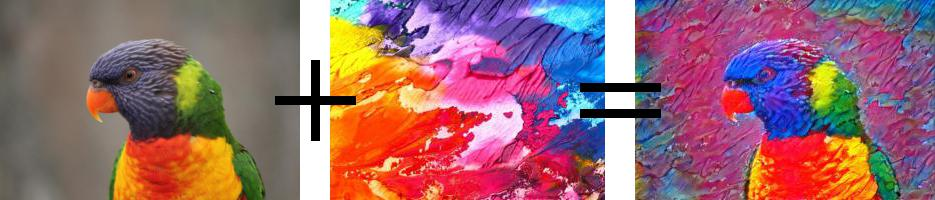

## **Code Implementation**

## **Installation**

In [ ]:
!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn nltk gensim tensorflow keras \
    tqdm scikit-image pillow pystiche --user -q --no-warn-script-location


import IPython
IPython.Application.instance().kernel.do_shutdown(True)


setup 

In [ ]:
import pystiche
from pystiche.image import read_image, write_image
from pystiche import demo, enc, loss, ops, optim
from pystiche.image import show_image
from pystiche.misc import get_device, get_input_image
print(f"I'm working with pystiche=={pystiche.__version__}")
device = get_device()
print(f"I'm working with {device}") 

## **Model**


We are going to load VGG19 and feed the input tensor to the model, to extract a feature map of the content, style, and output image. 

VGG19  model relatively(compared with ResNet, Inception,etc) generate better output for neural style transfer 

###multi-layer encoder

In [ ]:
multi_layer_encoder = enc.vgg19_multi_layer_encoder()
print(multi_layer_encoder)

Pystiche provides a MultiLayerEncoder, which enables to obtain all the necessary encoding after a single forward pass. 

## **Content Loss**

Content loss calculates the content representation in the content image, which gets captured in a generated image. In this example, content_layer generates encoding then passes it to content_encoder to extract features and thus with the content_weight gives output to content_loss. It is also the distance between the content image, which we want to preserve, to generate the output image. 


###content loss



In [ ]:
content_layer = "relu4_2"
content_encoder = multi_layer_encoder.extract_encoder(content_layer)
content_weight = 1e0
content_loss = ops.FeatureReconstructionOperator(
    content_encoder, score_weight=content_weight
)
print(content_loss) 

Style Loss

Style loss, measure the distance in style between the output image and style image. 

###style loss 

In [ ]:
style_layers = ("relu1_1", "relu2_1", "relu3_1", "relu4_1", "relu5_1")
style_weight = 1e3
def get_style_op(encoder, layer_weight):
    return ops.GramOperator(encoder, score_weight=layer_weight)
style_loss = ops.MultiLayerEncodingOperator(
    multi_layer_encoder, style_layers, get_style_op, score_weight=style_weight,
)
print(style_loss)

## **Perceptual Loss**

Perceptual loss is a metric of comparing two different images that look similar. It compares the high-level differences in content and style images. Perceptual loss uses feed-forward neural networks for image transformation. We combine the content_loss and style_loss into a joined PerceptualLoss, which will serve as the optimization criterion. The content_loss and style_loss together create the perceptual loss.


###computing perceptual loss

In [ ]:
criterion = loss.PerceptualLoss(content_loss, style_loss).to(device)
print(criterion)

load a input image

In [ ]:
# !wget -O cheetah.jpg https://cdn.mos.cms.futurecdn.net/Z6j2a3pPdyBTQ5iicDe9kn-1024-80.jpg

In [ ]:
content_image = read_image("cheetah.jpg", device=device)
show_image(content_image, title="Content image") 

load a style image 

In [ ]:
# !wget -O style.jpg https://byronsmuse.files.wordpress.com/2014/07/1890-wheatfield-with-crows-is-a-july-1890-painting-by-vincent-van-gogh.jpg

In [ ]:
style_image = read_image("style.jpg", device=device)
show_image(style_image, title="Style image") 

targets for the optimization criterion

In [ ]:
criterion.set_content_image(content_image)
criterion.set_style_image(style_image) 

Initialise the input image for training 

In [ ]:
starting_point = "content"
input_image = get_input_image(starting_point, content_image=content_image)
show_image(input_image, title="Input image") 

#start the style transfer training

output_image = optim.image_optimization(input_image, criterion, num_steps=1000)
#write the image to current folder 

write_image(output_image,'test.png', mode=None)
#show the output 

show_image(output_image, title="Output image")

#**Related Articles:**

> * [Guide to Pystiche](https://analyticsindiamag.com/pystiche/)

> * [MODNet](https://analyticsindiamag.com/modnet-a-trimap-free-realtime-portrait-matting/)

> * [Monk's AI](https://analyticsindiamag.com/build-computer-vision-applications-with-few-lines-of-code-using-monk-ai/)

> * [Guide to Google's Objectron](https://analyticsindiamag.com/objectron-dataset-tutorial-in-python/)

> * [Guide to OpenAI's CLIP](https://analyticsindiamag.com/hands-on-guide-to-openais-clip-connecting-text-to-images/)

> * [Guide to VISSL](https://analyticsindiamag.com/guide-to-vissl-vision-library-for-self-supervised-learning/)